In [1]:
%matplotlib inline

from heapq import*

import random as rd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import TSP

In [3]:
dfnode=pd.read_excel("./warehouse_node.xlsx").fillna("")
dwii  ={name:node for name,node in pd.read_excel("where_is_inventry.xlsx").values.tolist()}

In [4]:
# 仮想ピッキングクエリー作成

inventry=[name for name in dwii.keys() if name!="start"]

l=[]
for i in range(100):
    num=rd.randint(1,10)

    l.append("start,"+",".join( sorted(set(inventry[rd.randint(0,len(inventry)-1)]for i in range(num))) ))

pd.DataFrame(l).to_excel("query.xlsx",header=None,index=None)

In [5]:
# warehouse_nodeを読んで、使わないノードを経由したルートを作る(start_node,end_node,最短距離,最短距離の経由方法)
# 全点よりダイクストラをして、他の点への最短ルートと最短距離を記録

def DIJKSTRA(point,d):
    cost      = [float("inf")]*n
    path      = [[]for i in range(n)]
    Q         = []
    cost[point]=0
    path[point]=[point]
    heappush(Q,(point,cost[point],path[point]))
    while Q:
        prefnd,tmpC,tmpP=heappop(Q)
        if cost[prefnd]<tmpC:
            continue
        for node,c in d[prefnd]:
            altC=c+tmpC
            altP=tmpP+[node]
            if cost[node]>altC:
                path[node]=altP
                cost[node]=altC
                heappush(Q,(node,altC,altP))
    return cost,path



n=max(dfnode["node_number"])+1
d=[[]for i in range(n)]

nodelist=pd.concat([dfnode.loc[:,"node_number"],dfnode.loc[:,"connect_node_1":"connect_node_4"]],axis=1).values.tolist()

d={ line[0]:[int(num) for num in line[1:] if type(num)!=str] for line in nodelist}
d={k:[(i,1)for i in v] for k,v in d.items()}

toexcel=[["start","end","cost","root"]]
for start in range(n):
    c,p=DIJKSTRA(start,d)
    for end,cost,path in zip(range(n),c,p):
        toexcel.append([start,end,cost,",".join(map(str,path))])

pd.DataFrame(toexcel).to_excel("./warehouse_root.xlsx",header=None,index=None)

In [6]:
dfroot=pd.read_excel("warehouse_root.xlsx").values.tolist()
query =pd.read_excel("query.xlsx",header=None).values.tolist()

start,J,N,S
Using license file C:\Users\kyle\gurobi.lic
Academic license - for non-commercial use only
[21, 13, 11, 15] 12.0


C:\Users\kyle\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\kyle\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


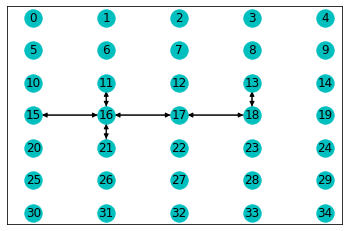

start,C,R
[21, 6, 15] 8.0


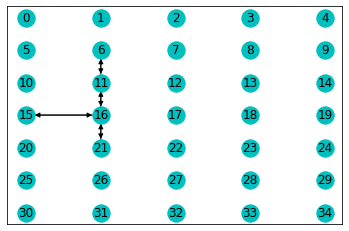

start,H,O,P
[9, 13, 15, 14] 14.0


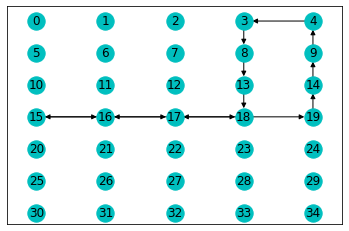

start,I,K,M,N,O,S,U,V,c
[10, 11, 27, 22, 23, 13, 12, 21, 15] 22.0


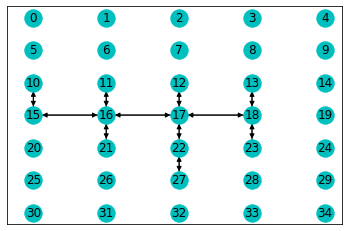

start,D,F,P,c,e
[7, 8, 14, 28, 27, 15] 22.0


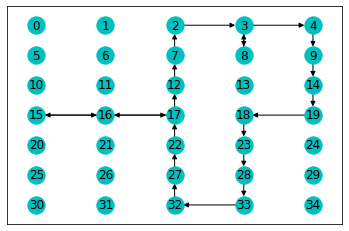

start,B,W
[23, 6, 15] 12.0


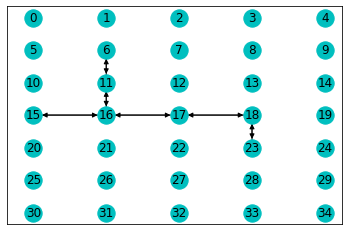

start,A
[5, 15] 4


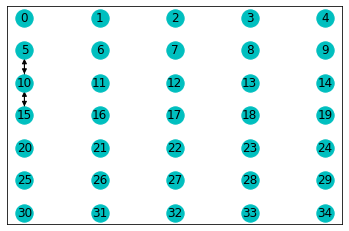

start,C,K,N,O,R,S,V,a,b
[6, 11, 15, 21, 26, 27, 23, 13] 20.0


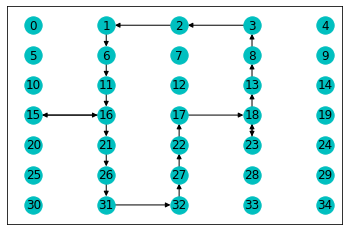

start,H,R,b
[9, 21, 15, 27] 18.0


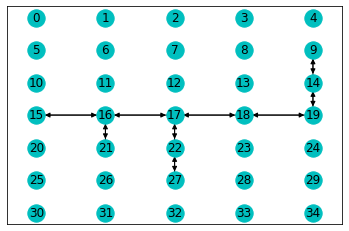

start,B,C,H,L,P,X,Y
[6, 9, 14, 24, 12, 25, 15] 22.0


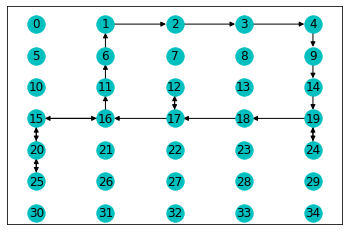

start,D,E,F,N,X,Z
[7, 8, 13, 24, 15, 26] 20.0


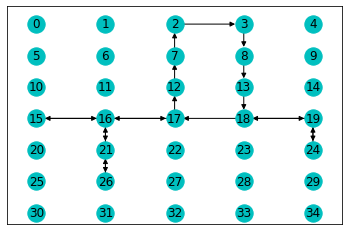

start,Q,c
[27, 15, 20] 10.0


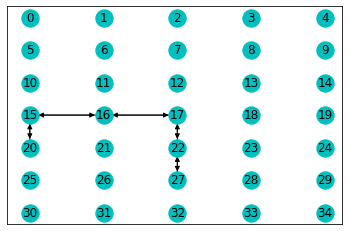

start,C,E,G,J,K,R
[6, 8, 7, 15, 21, 11] 16.0


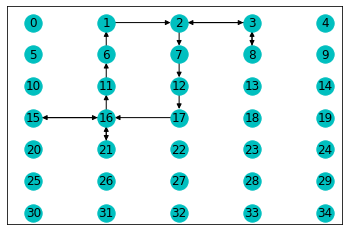

start,A,E,H,J,N,W,c
[5, 7, 9, 23, 13, 27, 11, 15] 26.0


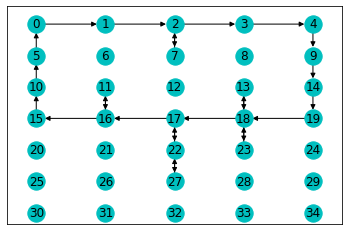

start,F,K,R,W,a
[8, 23, 11, 15, 21, 26] 18.0


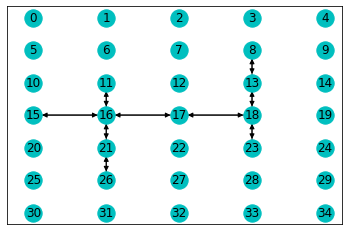

start,N,W,a,f
[13, 15, 26, 29, 23] 18.0


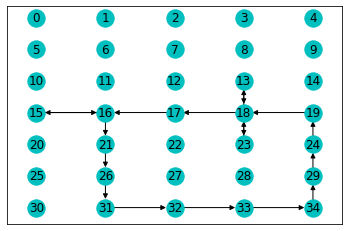

start,F,J,O,X
[8, 13, 11, 15, 24] 16.0


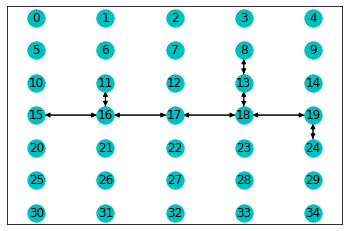

start,B,c,e
[27, 6, 15, 28] 16.0


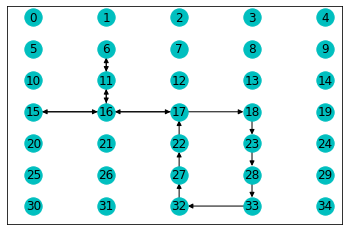

start,B,G,K,M,P,V,Z,a,c
[6, 8, 23, 14, 12, 27, 26, 15, 11] 26.0


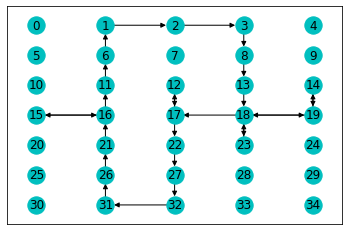

start,H,Q,R,W,X,e
[9, 23, 28, 20, 15, 21, 24] 22.0


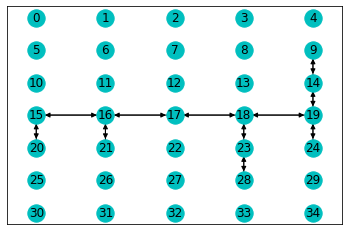

start,A,D,G,H,J,S,W
[5, 7, 8, 9, 23, 11, 21, 15] 24.0


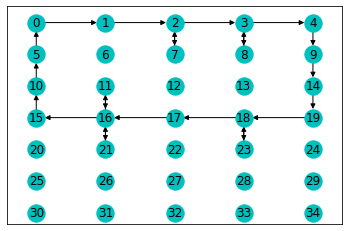

start,K,L,O,R,V,e
[11, 13, 23, 28, 12, 15, 21] 18.0


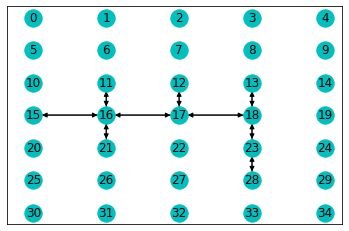

start,D,E,G,I,L,T,Y,d,e
[7, 8, 28, 25, 10, 15, 22, 12] 22.0


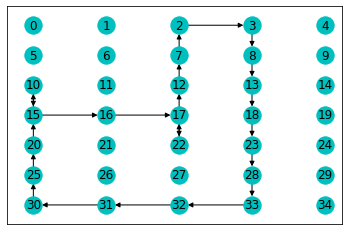

start,A,F,G,H,I,K,N,S,W
[5, 9, 8, 13, 23, 21, 11, 15, 10] 22.0


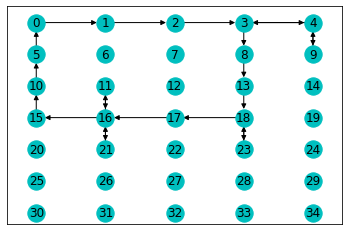

start,A,E,F,I,J,Q,b,c,d
[5, 7, 8, 28, 27, 11, 20, 15, 10] 24.0


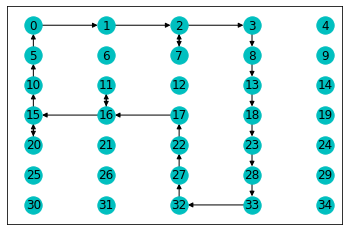

start,A,J,M,S,T,c,e
[5, 15, 11, 21, 12, 28, 27, 22] 22.0


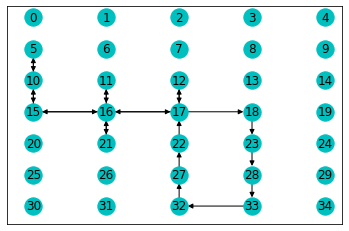

start,H,N,O,Q,Y,b,d
[9, 13, 15, 20, 25, 27, 28] 22.0


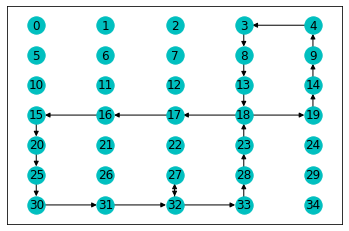

start,D,E,F,H,Q,R,b,c
[7, 9, 8, 27, 21, 20, 15] 24.0


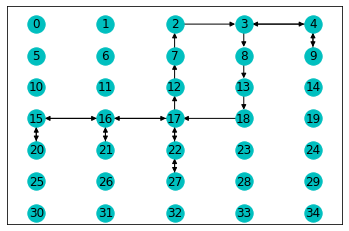

start,I
[10, 15] 2


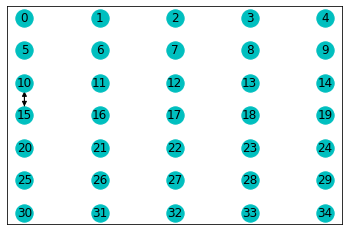

start,J,K,M,R,V,X,Y,b,e
[11, 15, 25, 27, 28, 23, 24, 12, 21] 24.0


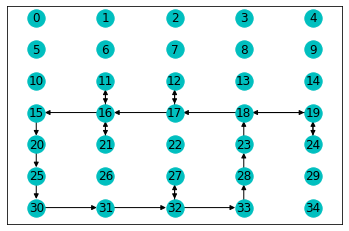

start,E,e
[7, 15, 28] 14.0


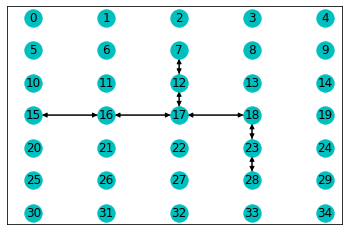

start,C,D,F,J,a
[6, 8, 7, 26, 15, 11] 18.0


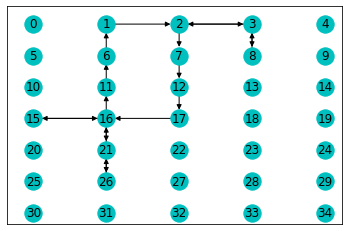

start,M
[12, 15] 6


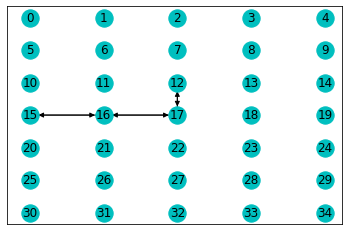

start,M,a,b,d
[12, 15, 26, 27, 28] 16.0


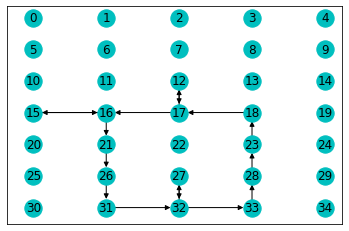

start,B,E,J,N,P,R,W,Y
[6, 7, 14, 13, 23, 21, 15, 25, 11] 26.0


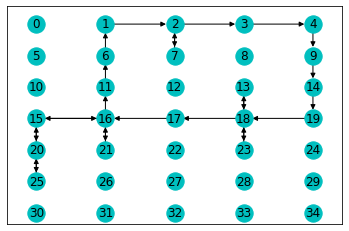

start,B,P,Q,X
[6, 20, 15, 14, 24] 18.0


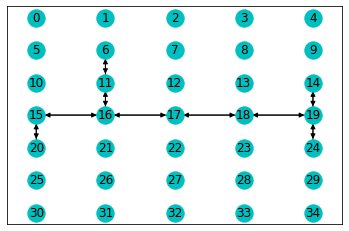

start,R,S,X,e,f
[15, 21, 24, 29, 28] 16.0


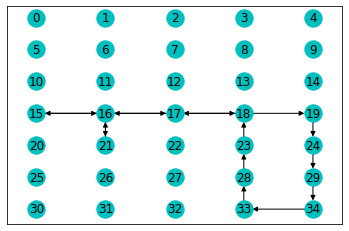

start,N,V,X
[24, 15, 13, 23] 14.0


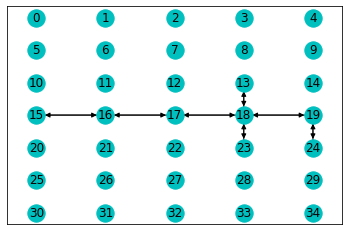

start,L,W
[12, 15, 23] 10.0


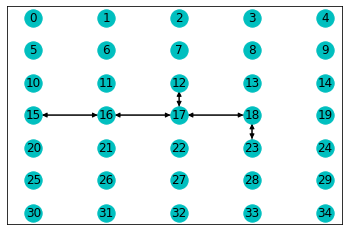

start,D,G,O,R,T,Y,a,b,e
[7, 8, 13, 28, 27, 22, 15, 25, 26, 21] 24.0


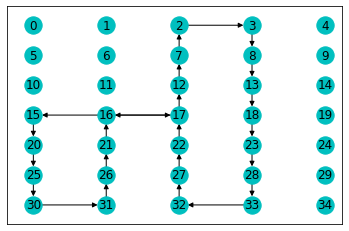

start,A,C
[5, 6, 15] 8.0


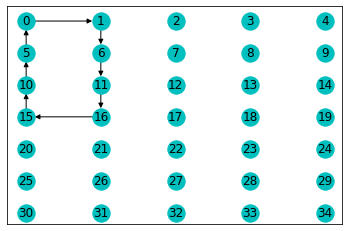

start,C,E,H,M,O,R,V,X,a
[6, 7, 12, 21, 26, 15, 23, 13, 24, 9] 28.0


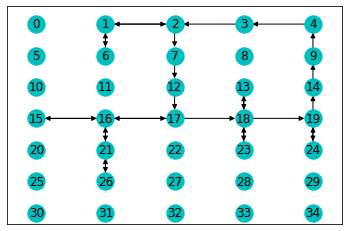

start,C,D,H,M,P,R,U,W
[6, 7, 9, 14, 23, 22, 12, 15, 21] 24.0


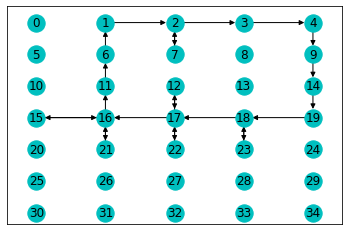

start,C,G,H,R,T,U,W,c
[6, 9, 8, 23, 27, 22, 15, 21] 24.0


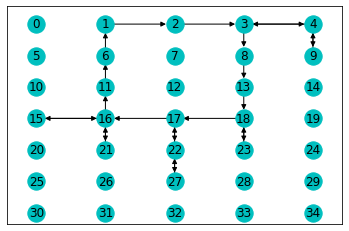

start,B,H,J,M,Q,S,c
[6, 9, 12, 27, 21, 15, 20, 11] 24.0


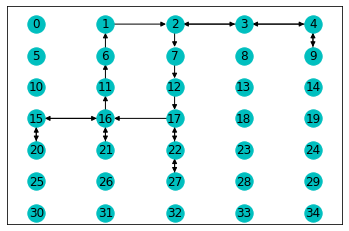

start,B,D,M,N,O,T,U,b,e
[6, 7, 12, 22, 27, 28, 13, 15] 20.0


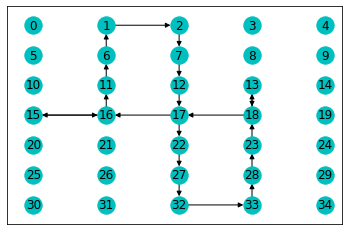

start,P,S,T,a,f
[14, 22, 15, 21, 26, 29] 18.0


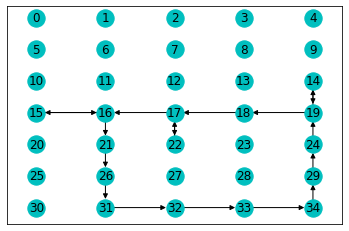

start,B,H,L,N,O,P,U,Y,e
[6, 9, 14, 28, 13, 22, 12, 15, 25] 28.0


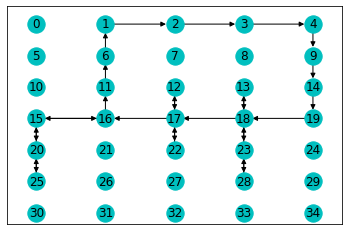

start,L,M,P,R,S,V,X,Z,d
[12, 14, 24, 23, 28, 26, 21, 15] 20.0


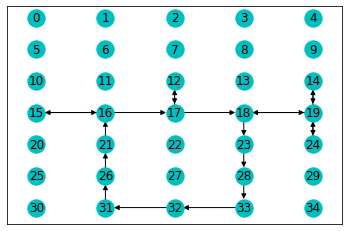

start,D,I,V,b
[7, 23, 10, 15, 27] 18.0


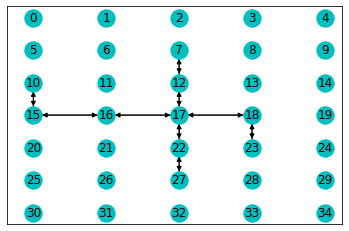

start,D,R,T,V,f
[7, 22, 15, 21, 29, 23] 22.0


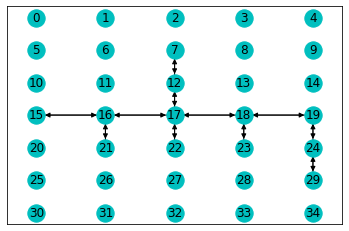

start,D,G,M,O,U
[7, 8, 13, 15, 22, 12] 14.0


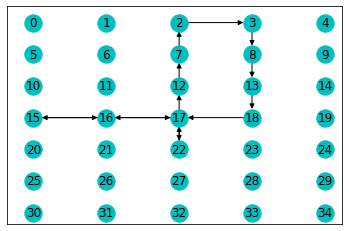

start,C,M,X,a
[6, 12, 24, 15, 26] 20.0


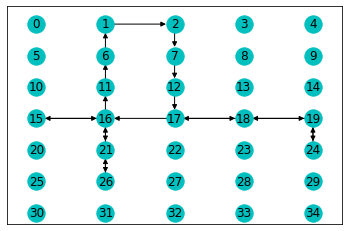

start,K,Z
[26, 11, 15] 8.0


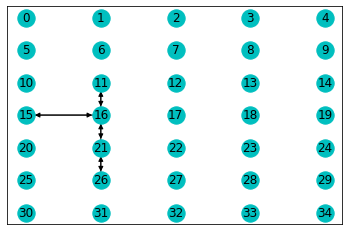

start,B,D,G,M,P,Q,T,V,f
[6, 7, 8, 23, 29, 14, 12, 22, 15, 20] 30.0


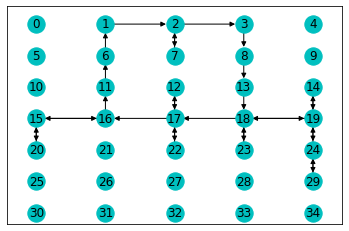

start,B,U,b
[27, 15, 6, 22] 12.0


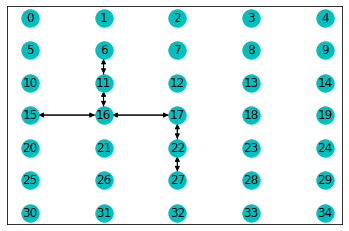

start,A,G,N,U,X,b,e,f
[5, 8, 13, 24, 29, 28, 27, 22, 15] 22.0


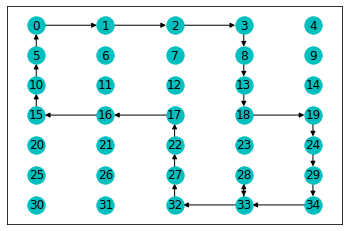

start,D,F,S,T
[7, 8, 22, 15, 21] 16.0


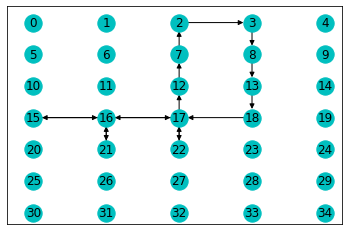

start,N,R,b,e
[13, 21, 15, 27, 28] 16.0


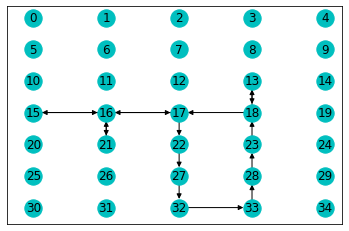

start,C,G,I,K,O,S,Y,a,c
[6, 8, 13, 27, 26, 21, 15, 25, 10, 11] 24.0


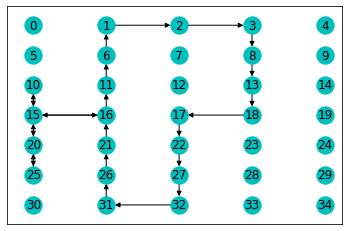

start,A,B,C,J,O,P,Y,Z
[5, 6, 11, 13, 14, 26, 25, 15] 24.0


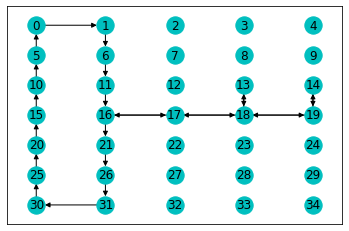

start,C,D,E,G,P,R,V,c
[6, 7, 8, 23, 14, 27, 15, 21] 26.0


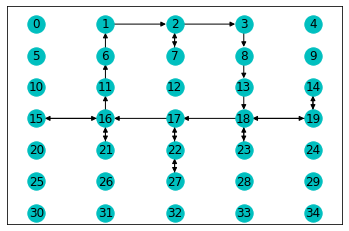

start,P,U,b
[27, 15, 14, 22] 14.0


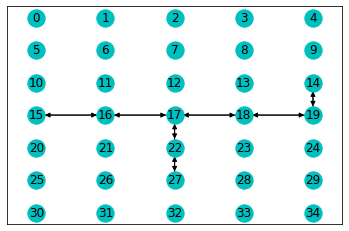

start,X,a,c
[24, 15, 26, 27] 16.0


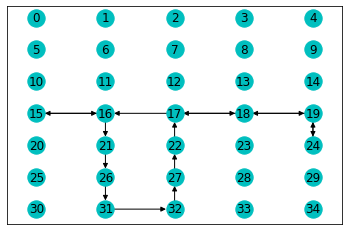

start,G,I,O,R,V,Z,d
[8, 13, 23, 28, 26, 21, 10, 15] 18.0


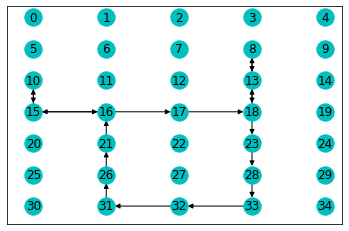

start,F,H,P,S,U,e
[8, 9, 14, 28, 22, 15, 21] 22.0


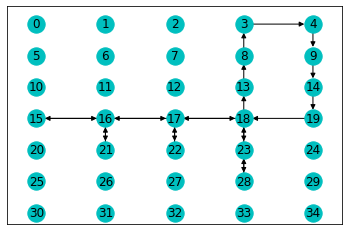

start,E,F,H,L,T,X,c,e
[7, 8, 9, 24, 28, 27, 22, 15, 12] 24.0


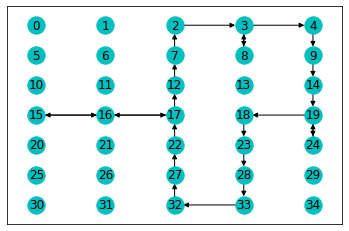

start,L,M,N,Z
[26, 13, 12, 15] 14.0


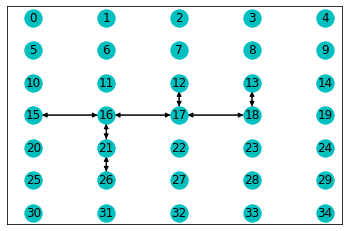

start,E,L,N,P,Q,S,a,c
[7, 12, 13, 14, 27, 26, 21, 20, 15] 24.0


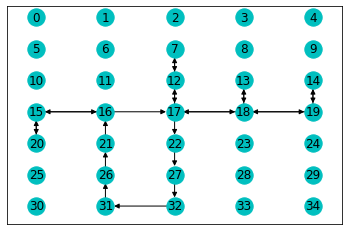

start,M,P,V
[12, 14, 23, 15] 14.0


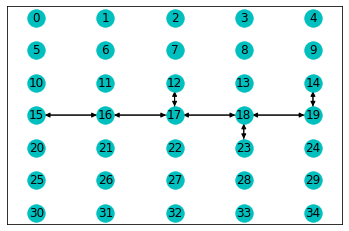

start,B,E,J,c
[6, 7, 27, 15, 11] 14.0


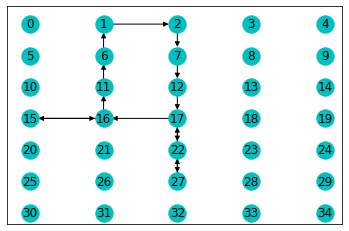

start,M,c,f
[27, 12, 15, 29] 16.0


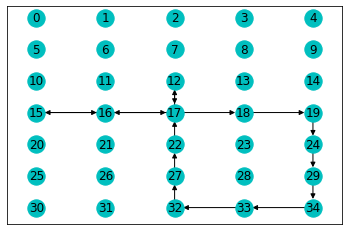

start,H,O,Y
[9, 13, 25, 15] 18.0


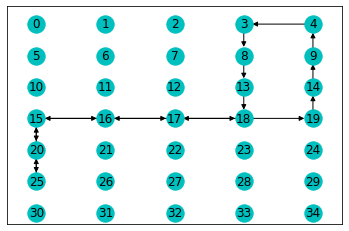

start,B,C,F,H,P,S,X
[6, 8, 9, 14, 24, 21, 15] 20.0


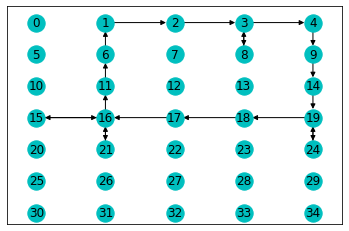

start,B,M
[12, 6, 15] 10.0


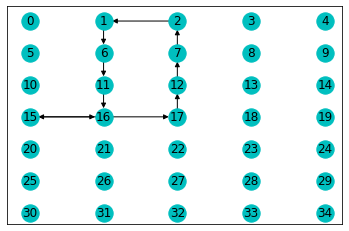

start,C,H,I,P,Q,T,Z,c
[6, 9, 14, 22, 27, 26, 10, 20, 15] 24.0


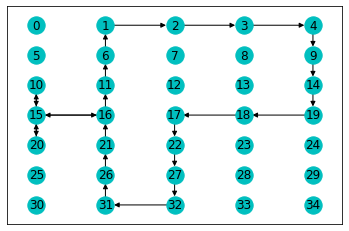

start,D,G,U
[8, 7, 15, 22] 14.0


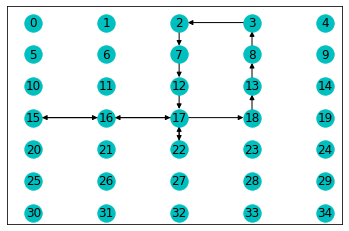

start,A,B,D,I,O,Q,Z,c,f
[5, 6, 7, 13, 29, 27, 26, 20, 15, 10] 28.0


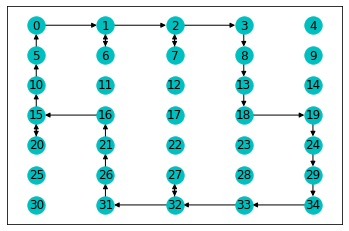

start,I,U,W,b
[10, 15, 23, 27, 22] 14.0


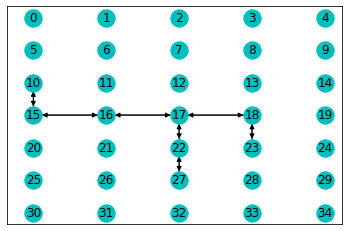

start,C,F,L,M,R,f
[6, 8, 29, 12, 15, 21] 22.0


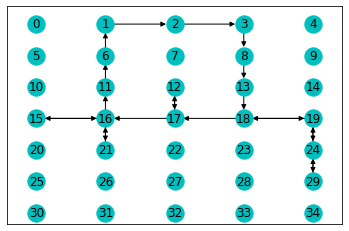

start,K
[11, 15] 4


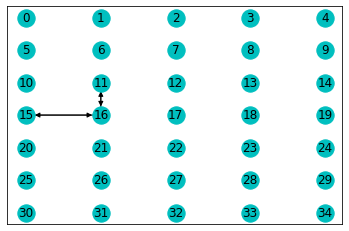

start,F,L,M,N,S,T,e
[8, 13, 22, 21, 15, 12, 28] 20.0


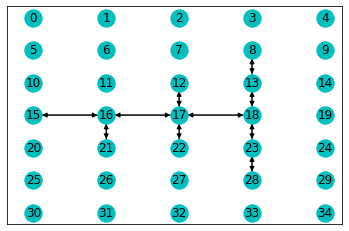

start,L,d
[12, 15, 28] 12.0


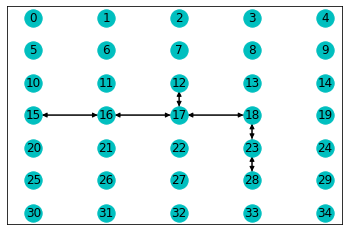

start,K,f
[11, 15, 29] 14.0


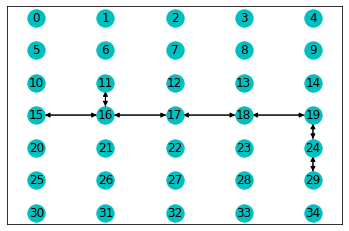

start,L,O,U,c
[12, 13, 15, 22, 27] 14.0


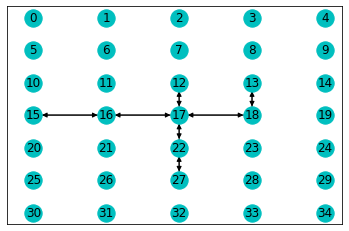

start,H,L,T,c,f
[9, 15, 12, 22, 27, 29] 20.0


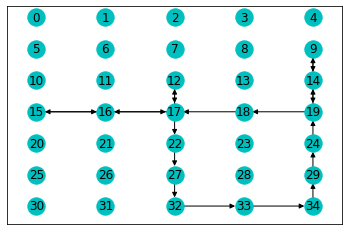

start,C,D,F,P,Z,b,d
[6, 7, 8, 14, 28, 27, 26, 15] 26.0


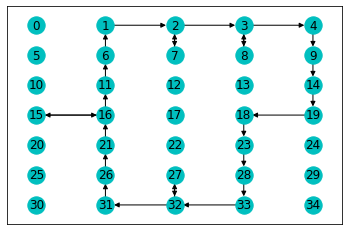

start,M,Q
[12, 15, 20] 8.0


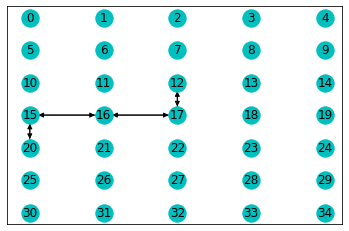

start,H,I,N,Z
[9, 13, 26, 10, 15] 20.0


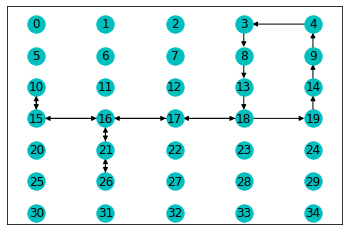

start,C,J,N,Q,R,T,V,Y,e
[6, 11, 15, 20, 25, 28, 23, 13, 22, 21] 22.0


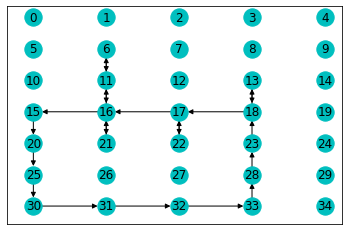

start,E,H,P,Y,f
[7, 9, 14, 29, 25, 15] 20.0


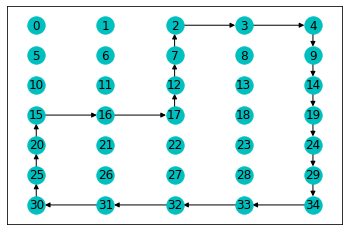

start,G,H,I,Q,S,U,b
[8, 9, 22, 27, 21, 15, 10, 20] 24.0


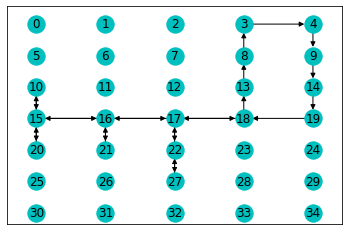

start,O,W,X,Y,a,e
[13, 23, 28, 26, 25, 15, 24] 20.0


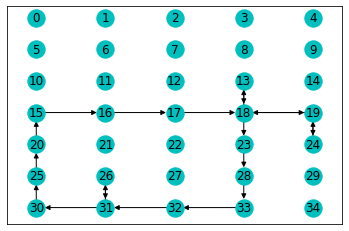

start,F,H,I,L,P,Q,a,f
[8, 9, 14, 29, 26, 15, 20, 10, 12] 26.0


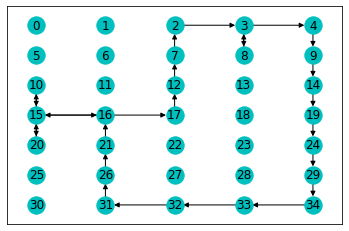

start,G,I,N
[8, 10, 15, 13] 12.0


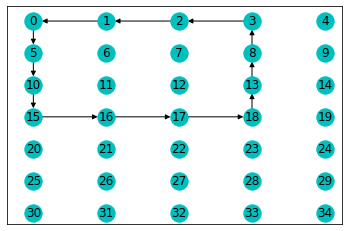

start,H,K,c
[27, 9, 15, 11] 18.0


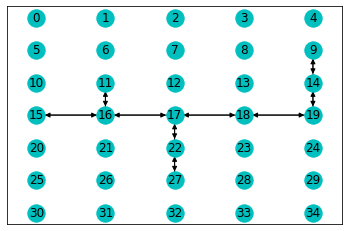

start,A,B,C,H,J,K,L,M,U
[5, 6, 9, 22, 12, 11, 15] 22.0


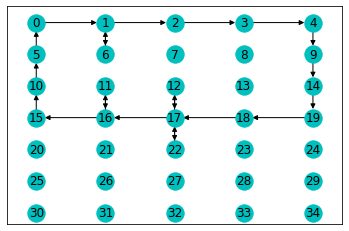

start,A,B,E,J,O,P,S,d
[5, 7, 6, 11, 13, 14, 28, 21, 15] 28.0


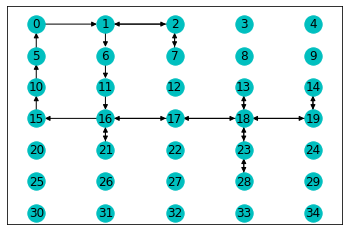

start,C,O,U,b,c
[6, 15, 13, 22, 27] 16.0


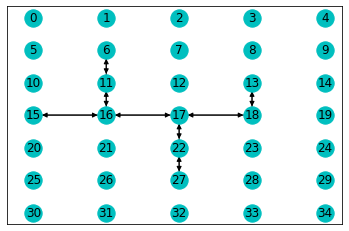

start,M
[12, 15] 6


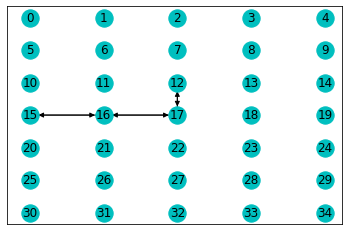

In [7]:
# queryに対しTSPを計算して、ダイクストラで前計算しておいたルートを表示

subroot={(start,end):root.split(",")for start,end,cost,root in dfroot}
for q in query:
    print(q[0])
    q=set([dwii[name]for name in q[0].split(",")])
    n=len(q)
    oldtonew={node:newnode for newnode,node in enumerate(q)}
    newtoold={newnode:node for node,newnode in oldtonew.items()}
    dist = {(oldtonew[start],oldtonew[end]):cost for start,end,cost,root in dfroot if start>end and start in q and end in q}
#    print(dist)
    try:
        root,cost=TSP.main(n,dist)
        root=[newtoold[i]for i in root]
        print(root,cost)
    except:
        root=list(q)
        cost=sum(dist.values())*2
        print(root,cost)
        
    G=nx.DiGraph()
    G.add_nodes_from([str(i)for i in dfnode["node_number"]])
    for i in range(-1,len(root)-1):
        sr=subroot[(root[i],root[i+1])]
        for j in range(len(sr)-1):
            G.add_edge(sr[j],sr[j+1])
    
    pos={str(num):(x,-y) for num,x,y in zip(dfnode["node_number"],dfnode["point_x"],dfnode["point_y"])}
    nx.draw_networkx(G, pos=pos, node_color="c")
    plt.show()

#print(points)
#print(dist)
